In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_pickle('../Dataframes/df_compiled_adjusted_daily_temp_gbg_save.pkl')

In [5]:
df

,Datum,Kvalitet,Snittemperatur,Year,Month,day_of_year,Over_10_5_days_in_a_row,0_or_under_5_days_in_a_row
0,1944-01-01,G,3.20,1944,1,1,0,0
1,1944-01-02,G,3.60,1944,1,2,0,0
2,1944-01-03,G,2.80,1944,1,3,0,0
3,1944-01-04,G,-4.47,1944,1,4,0,0
4,1944-01-05,G,-1.40,1944,1,5,0,0
...,...,...,...,...,...,...,...,...
29002,2023-06-27,G,17.02,2023,6,178,0,0
29003,2023-06-28,G,18.56,2023,6,179,0,0
29004,2023-06-29,G,18.06,2023,6,180,0,0
29005,2023-06-30,G,16.24,2023,6,181,0,0


In [35]:
def tempslope(data):
     slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'], data['Snittemperatur'])
     angle_degrees = np.arctan(slope) * 180 /np.pi
     increase = slope * 79
     return angle_degrees, intercept.max(), increase

In [36]:
jan = df[df['Month'] == 1]
feb = df[df['Month'] == 2]
mar = df[df['Month'] == 3]
apr = df[df['Month'] == 4]
maj = df[df['Month'] == 5]
jun = df[df['Month'] == 6]
jul = df[df['Month'] == 7]
aug = df[df['Month'] == 8]
sept = df[df['Month'] == 9]
okt = df[df['Month'] == 10]
nov = df[df['Month'] == 11]
dece = df[df['Month'] == 12]

In [41]:
anglelist = []
increases = []
templist = [jan, feb, mar, apr, maj, jun, jul, aug, sept, okt, nov, dece]
manadlista = ['Januari', 'Februari', 'Mars', 'April', 'Maj', 'Juni', 'Juli', 'Augusti', 'September', 'Oktober', 'November', 'December']
for i, x in enumerate(templist):
    angle, intercept, increase = tempslope(x)
    print(f"Angle of the trendline in {manadlista[i]} is: {angle.round(3)}, intercept {intercept}, increase {increase.round(3)}")
    print()
    anglelist.append(angle.round(3))
    increases.append(increase.round(3))

Angle of the trendline in Januari is: 1.92, intercept -67.23995402507448, increase 2.648

Angle of the trendline in Februari is: 2.426, intercept -85.09319557949709, increase 3.347

Angle of the trendline in Mars is: 1.314, intercept -43.92589114982683, increase 1.812

Angle of the trendline in April is: 0.826, intercept -22.573951465072675, increase 1.139

Angle of the trendline in Maj is: -0.208, intercept 18.493410768567674, increase -0.287

Angle of the trendline in Juni is: -0.025, intercept 15.844566897171424, increase -0.034

Angle of the trendline in Juli is: 0.051, intercept 15.163214091646461, increase 0.071

Angle of the trendline in Augusti is: 0.104, intercept 12.735415310801923, increase 0.143

Angle of the trendline in September is: 0.151, intercept 7.509160702693932, increase 0.209

Angle of the trendline in Oktober is: 0.307, intercept -2.1817100936017795, increase 0.424

Angle of the trendline in November is: 1.14, intercept -35.392193029860444, increase 1.573

Angle 

In [42]:
increases

[2.648,
 3.347,
 1.812,
 1.139,
 -0.287,
 -0.034,
 0.071,
 0.143,
 0.209,
 0.424,
 1.573,
 0.832]

In [46]:
df_increases = pd.DataFrame({'Month': manadlista, 'Increase': increases})

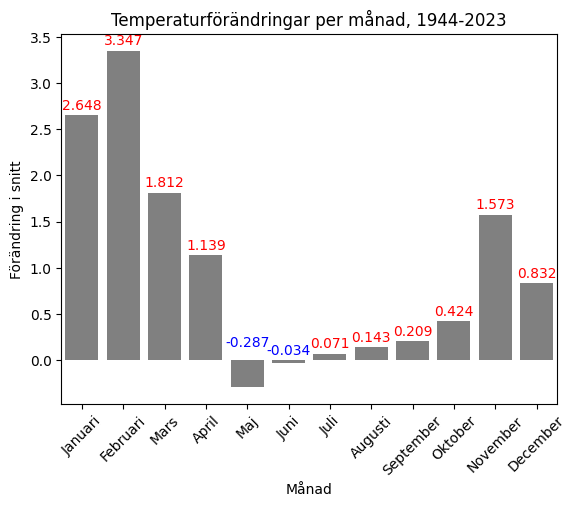

In [88]:
sns.barplot(df_increases, x='Month', y='Increase', orient='v', color='grey')
for i, x in enumerate(df_increases['Increase']):
    if x >= 0:
        plt.text(i, x + 0.03, str(x), ha='center', va='bottom', c='r')
    else:
        plt.text(i, x*x + 0.03, str(x), ha='center', va='bottom', c='b')
plt.xticks(rotation=45)
plt.ylabel('Förändring i snitt')
plt.xlabel('Månad')
plt.title('Temperaturförändringar per månad, 1944-2023')
plt.show()